# Systems Immunogenetics Project

## West Nile Virus QTL Phenotype Clustering

### McWeeney Lab, Oregon Health & Science University

#### Author: Steve Chamberlin (chambest@ohsu.edu)

## Introduction

This document will run through steps that will use k-means clustering to group QTL based on their peak LOD position. The only requirment for inclusion in the clustering is that the peak LOD value is over 6, but this can be changed. The number of clusters, k, will also need to be set. For this study QTL were only clustered if the associated phenotypes were all in the same tissue,time,panel combination and, of course, chromosome. The purpose of this clustering was to increase the number of overlapping QTL in a genomic region for use in subequent QTL hotspot analyses.

Required Files:

- This notebook** (`WNV_QTL_Phenotype_Clustering_Publication.ipynb`): [[Download here]](https://github.com/chambest/WNV_QTL_Resource/tree/main/Code)
- The R script (contains required R packages and custom functions) (`WNV_rix_qtl_mapping_functions_publication.r`): [[Download here]](https://github.com/chambest/WNV_QTL_Resource/tree/main/Code)
- Annotated QTL information (`Final Annotated QTL.csv`): [[Download here]](https://figshare.com/articles/dataset/Processed_and_annotated_QTL_and_SNP_files/28147970)

** Note: this notebook can also be downloaded as an R script (only the code blocks seen below will be included): [[Download R script here]](https://github.com/chambest/WNV_QTL_Resource/tree/main/Code)

**All code is available on GitHub: (https://github.com/chambest/WNV_QTL_Resource/tree/main/Code) ** 

If you are not familiar with Jupyter Notebooks, Michael Mooney has created a short tutorial to get you up and running quickly. There is also plenty of documentation online:

1. [Jupyter for R Tutorial](http://nbviewer.jupyter.org/github/mooneymi/jupyter_notebooks/blob/master/r/Getting_Started_R.ipynb)
2. [Jupyter Documentation](http://jupyter.org/)
3. [Conda and R](https://www.continuum.io/conda-for-r)

#### Output

At the end, this workflow will output a figure showing the positions of the QTL within a chromosome with the cluster assignments. This report is designed to be used in an iterative process to determine the best fitting clusters.

## Step 1. Load Necessary R Functions and Libraries

In [ ]:
## Load R functions and libraries and download necessary files
source('../WNV_rix_qtl_mapping_functions_publication.r')

### The files below need to have destination directories added by replacing ??????. ####

# Download Final Annotated QTL.csv
download.file(url = "https://figshare.com/ndownloader/files/51509951", destfile = "??????/Final Annotated QTL.csv")

## Step 2. Set up and run the k-means clustering

In [ ]:
## Read the QTL data and select the panel, tissue, time and chomosome of interest
allqtls<-read.csv('??????/Final Annotated QTL.csv')
 
qtls<-filter(allqtls,Panel=='Treg' & Tissue=='Spleen' & Time=='D07' & Chromosome=='X')
minint=min(qtls$Start.Pos)
maxint=max(qtls$End.Pos)

In [ ]:
## Run the k-means clustering, select peak lod value cutoff and set k based on the number of QTL being clustered
set.seed(20000)
cluster<-qtls[qtls$Peak.LOD.Value>=6,]
 
clust<-ifelse(nrow(cluster)>8,8,ifelse(nrow(cluster)>4 & nrow(cluster)<8,5,2)) 

fit <- kmeans(cluster$Peak.LOD.Position, clust)  

# append cluster assignment
cluster<- data.frame(cluster$Phenotype, fit$cluster)

ints<-left_join(qtls,cluster,by=c("Phenotype"="cluster.Phenotype"))


## Step 3. Run clustering report


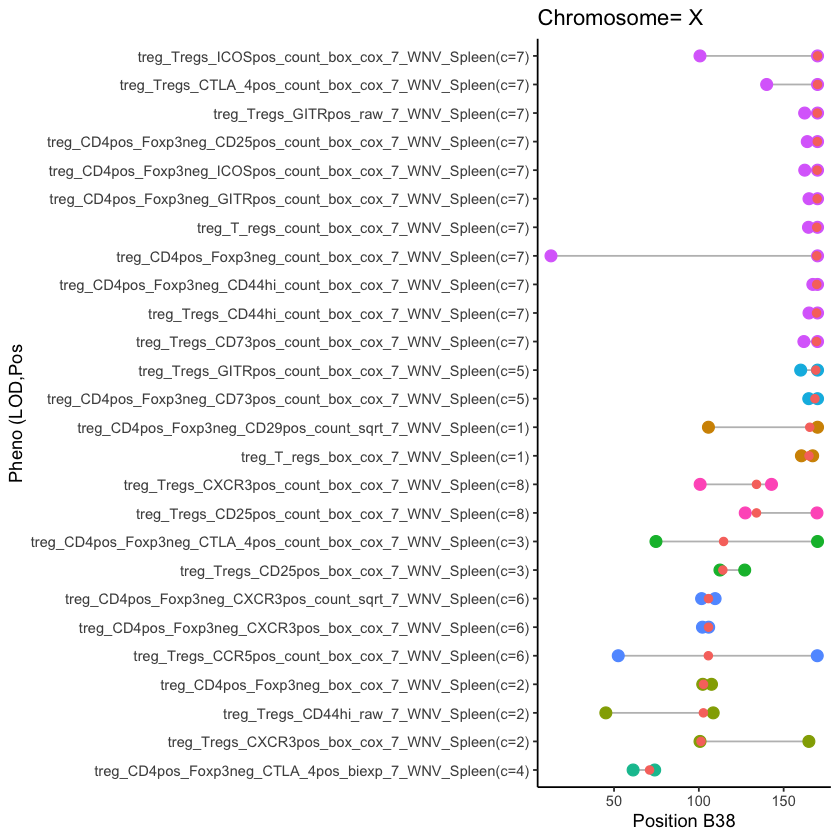

In [5]:
## Generate the clustering report
chr='X'
cc <- function(x){ifelse(x==1, "red1",ifelse(x==2,"red2",ifelse(x==3,"red3",ifelse(x==4,"red4",
                                                                                   ifelse(x==5,'red5',ifelse(x==6,"red6",ifelse(x==7,"red7",ifelse(x==8,"red8","green"))))))))}
ff <- function(x){ifelse(x < 6, "grey3","black")}

ints$pheno=paste0(ints$Phenotype,'(c=',ints$fit.cluster,')')

gg<-ggplot(ints[ints$Peak.LOD.Value>=6,]) +
  geom_segment( aes(x=reorder(pheno, Peak.LOD.Position, FUN=median), xend=pheno, y=Start.Pos, yend=End.Pos), color="grey") +
  geom_point( aes(x=pheno, y=Start.Pos, color=cc(fit.cluster)), size=3 ) +
  geom_point( aes(x=pheno, y=End.Pos, color=cc(fit.cluster)),size=3 ) +
  geom_point( aes(x=pheno, y=Peak.LOD.Position, color=ff(Peak.LOD.Value)),size=2) +
  coord_flip() +
  theme_classic() +  
  theme(
    legend.position = "none",
  ) +
  xlab("Pheno (LOD,Pos") +
  ylab("Position B38")  + ggtitle(paste0('Chromosome= ',chr))
print(gg)
 